 #  <p style="text-align: center;">Technical Support Data Analysis

# <font color=green>MODULE 5 UNSUPERVISED LEARNING MODEL_CLUSTERING

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

## <font color=blue> TASK 1 :Explain the packages imported

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics


## <font color=blue> TASK 2 :What are the data types of the variables of the dataset? What does each row of the dataset contain?

In [9]:
tech_supp_df = pd.read_csv("technical_support_data.csv")

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [10]:
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [11]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [3]:
tech_supp_df.shape

(23, 8)

In [12]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [5]:
tech_supp_df['PROBLEM_TYPE'].unique()

array(['Temperature control not working',
       'power chord does not tightly fit', 'Fan swing not working',
       'Main switch does not on', 'Forgot mobile app password',
       'AC stops abruptly', 'App hangs while entring commands',
       'App takes a long time to initialize',
       'Unable to connect the App to the device',
       'Reinstalling the app hangs the phone',
       'Mobile screen blanks on use of phone',
       'Cluttered with popup messages', 'AC controller sofware missing',
       'AC remote does not  work', 'Remote Keys get stuck ',
       'Unable to operate menu from remote',
       'Motor noise from the system ', 'Freshner holder stuck ',
       'Factory settings not working', 'WIFI connectivity breaks ',
       'Battery backup does not get fully charged',
       'Battery does not last full 8 hrs',
       'Fan speed varies at on its own'], dtype=object)

In [6]:
tech_supp_df.isna().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [14]:
pd.set_option('display.max_colwidth', None)
arr = []

for col in tech_supp_df.columns:
    arr.append(tech_supp_df[col].unique())

df = pd.DataFrame({'Columns': tech_supp_df.columns, 'Unique Value':arr})
df

,Columns,Unique Value
0,PROBLEM_TYPE,"[Temperature control not working, power chord does not tightly fit, Fan swing not working, Main switch does not on, Forgot mobile app password, AC stops abruptly, App hangs while entring commands, App takes a long time to initialize, Unable to connect the App to the device, Reinstalling the app hangs the phone, Mobile screen blanks on use of phone, Cluttered with popup messages, AC controller sofware missing, AC remote does not work, Remote Keys get stuck , Unable to operate menu from remote, Motor noise from the system , Freshner holder stuck , Factory settings not working, WIFI connectivity breaks , Battery backup does not get fully charged, Battery does not last full 8 hrs, Fan speed varies at on its own]"
1,no_of_cases,"[170, 12, 5, 3, 45, 47, 165, 321, 22, 23, 230, 193, 24, 450, 520, 390, 140, 72, 290, 29, 43, 78]"
2,Avg_pending_calls,"[1.3, 2.0, 1.0, 2.3, 3.1, 4.0, 1.2, 3.3, 4.3, 2.8, 1.7, 1.1, 2.2, 2.1]"
3,Avg_resol_time,"[32, 150, 35, 8, 54, 132, 154, 5, 140, 143, 23, 33, 180, 7, 9, 125, 11, 45, 56, 44]"
4,recurrence_freq,"[0.04, 0.01, 0.02, 0.15, 0.3, 0.03, 0.21, 0.14, 0.25, 0.28, 0.27, 0.05, 0.22, 0.35, 0.31, 0.19]"
5,Replace_percent,"[0.0, 0.5, 0.2, 0.7, 0.03, 0.05, 0.01, 0.06, 0.04, 0.22, 0.28, 0.21]"
6,In_warranty_percent,"[75, 5, 90, 99, 100, 95, 60, 10, 50]"
7,Post_warranty_percent,"[25, 95, 10, 1, 0, 5, 40, 90, 50]"


## <font color=blue> TASK 3 :What could be the minimum value of k?

In [6]:
tech_supp_df.iloc[:,1:]

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.00,75,25
1,12,2.0,150,0.01,0.50,5,95
2,5,1.0,35,0.02,0.20,90,10
3,3,2.0,8,0.01,0.70,5,95
4,45,2.3,54,0.15,0.00,99,1
5,47,3.1,132,0.30,0.03,100,0
6,12,4.0,154,0.02,0.05,100,0
7,165,1.2,32,0.03,0.00,95,5
8,321,1.0,5,0.21,0.00,60,40
9,22,3.3,140,0.14,0.01,95,5


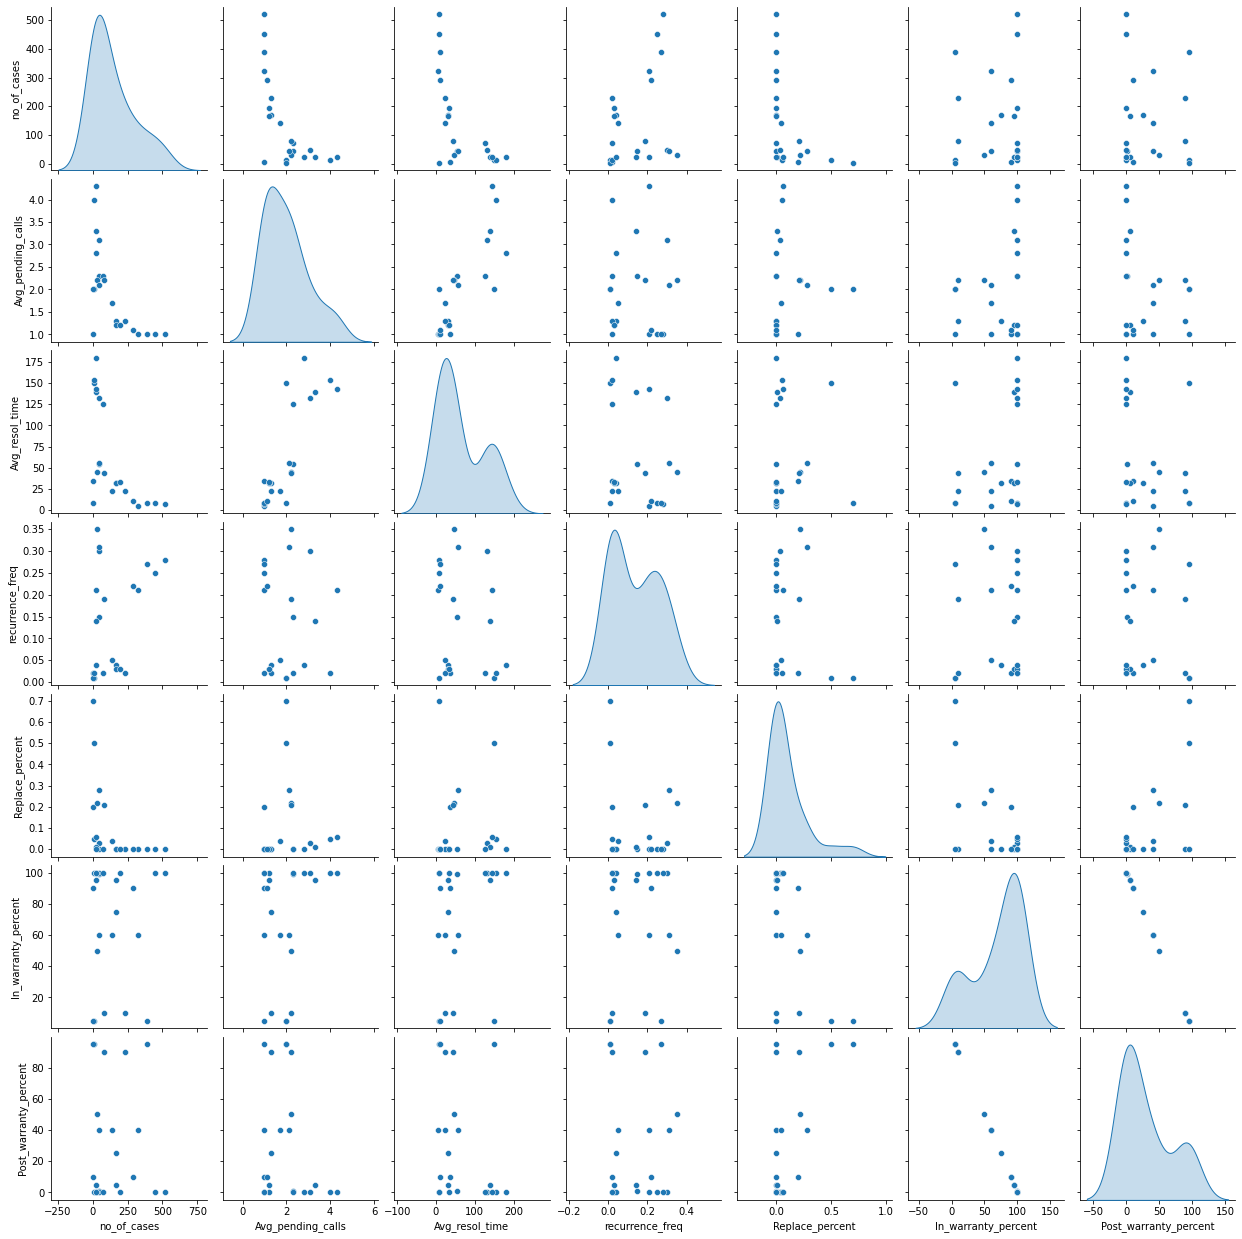

In [8]:
sns.pairplot(techSuppAttr,diag_kind='kde')

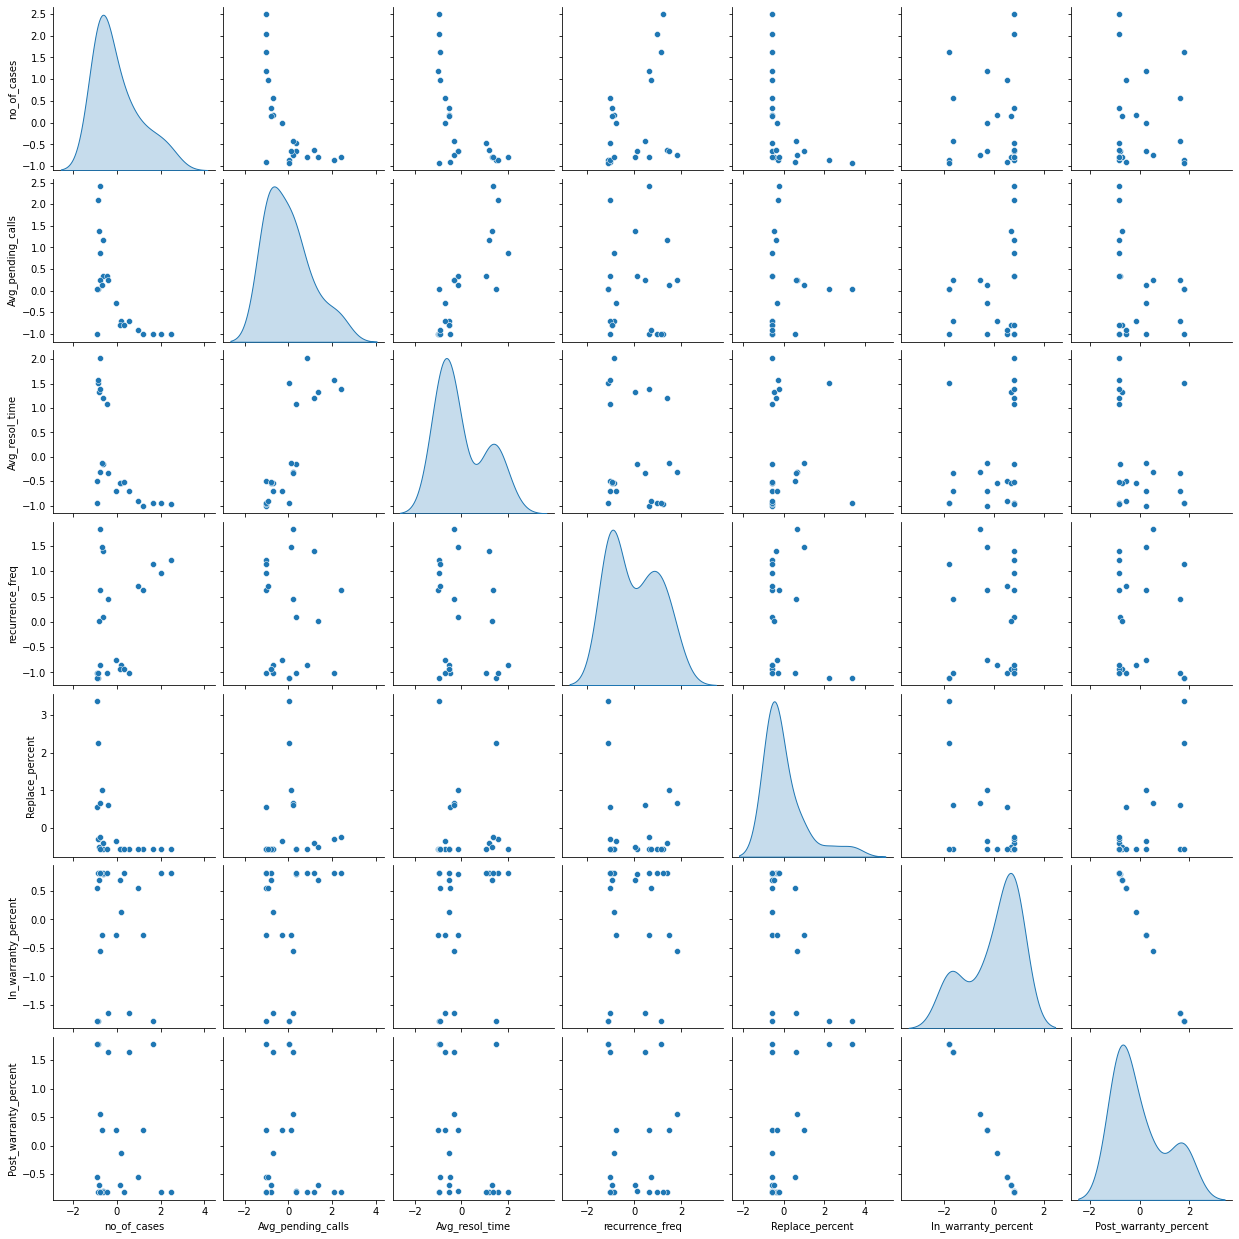

In [17]:
techSuppAttr=tech_supp_df.iloc[:,1:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

# <font color=green> Use of Elbow method

C:\Users\daijun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


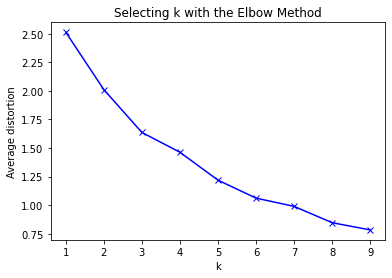

In [18]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, 
                                            model.cluster_centers_, 
                                            'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');


Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

## <font color=blue> TASK 4 :What are we doing here?

In [19]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.


In [20]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
1,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


## <font color=blue> TASK 5 :Write a summary for k=3 and 5

## <font color=blue> :Explain how the groups differ from one another

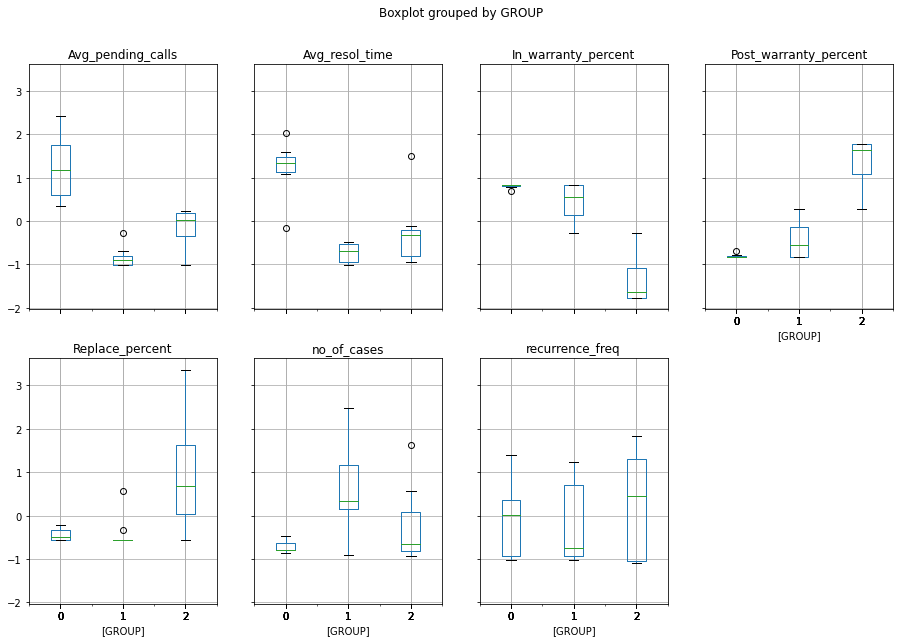

In [21]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

## <font color=blue> TASK 6 :Explain how each group varies from each other

In [35]:
#  Let us next try with K = 5, the next elbow point

In [22]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,3
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,3
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [23]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
1,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
2,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
3,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000
4,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000


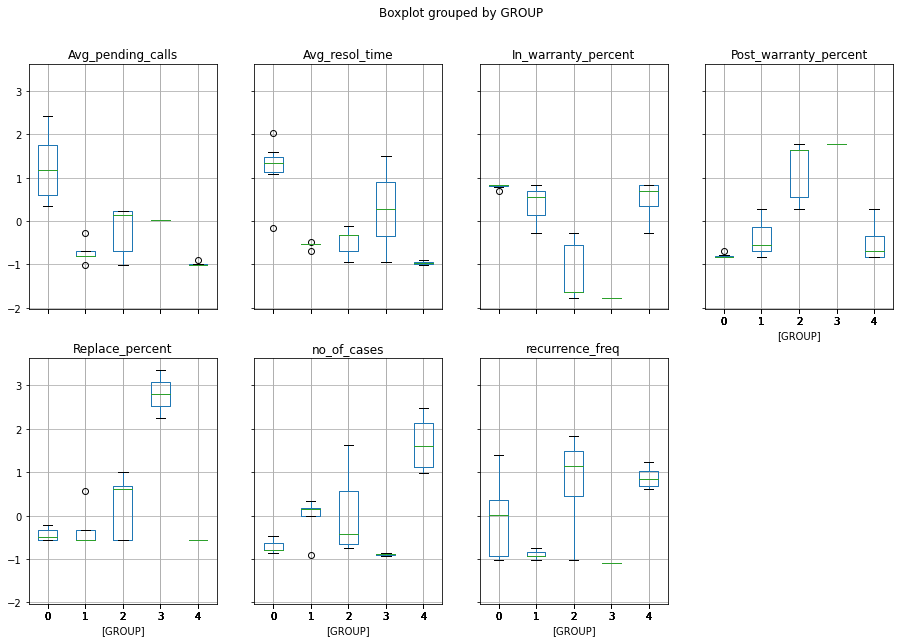

In [24]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));